# 트위터 일자별 크롤링 시도(1월 1일~ 5월 31일)

In [1]:
import datetime 
from twitterscraper.query import query_tweets

def daily_twitter(keyword, m, d):
    for i in range(d+1)[1:]:
        if i != d:
            f = open(f'c:/data/twitter/twitter_{m}m{i}d.txt',mode='w',encoding='utf-8')
            list_of_tweets = query_tweets(keyword,
                                          begindate=datetime.date(2020,m,i),
                                          enddate=datetime.date(2020,m,i+1),
                                          limit = 100)

            for tweet in list_of_tweets:
                f.write(str(tweet.text)+'\n')
            f.close()
        else:
            f = open(f'c:/data/twitter/twitter_{m}m{i}d.txt',mode='w',encoding='utf-8')
            list_of_tweets = query_tweets(keyword,
                                          begindate=datetime.date(2020,m,i),
                                          enddate=datetime.date(2020,m+1,1),
                                          limit = 100)

            for tweet in list_of_tweets:
                f.write(str(tweet.text)+'\n')
            f.close()

INFO: {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; x64; fr; rv:1.9.2.13) Gecko/20101203 Firebird/3.6.13', 'X-Requested-With': 'XMLHttpRequest'}


In [2]:
daily_twitter('코로나',1,31)
daily_twitter('코로나',2,29)
daily_twitter('코로나',3,31)
daily_twitter('코로나',4,30)
daily_twitter('코로나',5,31)

INFO: queries: ['코로나 since:2020-01-01 until:2020-01-02']
INFO: Got 30 tweets (30 new).
INFO: queries: ['코로나 since:2020-01-02 until:2020-01-03']
INFO: Got 37 tweets (37 new).
INFO: queries: ['코로나 since:2020-01-03 until:2020-01-04']
INFO: Got 45 tweets (45 new).
INFO: queries: ['코로나 since:2020-01-04 until:2020-01-05']
INFO: Got 42 tweets (42 new).
INFO: queries: ['코로나 since:2020-01-05 until:2020-01-06']
INFO: Got 53 tweets (53 new).
INFO: queries: ['코로나 since:2020-01-06 until:2020-01-07']
INFO: Got 43 tweets (43 new).
INFO: queries: ['코로나 since:2020-01-07 until:2020-01-08']
INFO: Got 49 tweets (49 new).
INFO: queries: ['코로나 since:2020-01-08 until:2020-01-09']
INFO: Got 59 tweets (59 new).
INFO: queries: ['코로나 since:2020-01-09 until:2020-01-10']
INFO: Got 92 tweets (92 new).
INFO: queries: ['코로나 since:2020-01-10 until:2020-01-11']
INFO: Got 88 tweets (88 new).
INFO: queries: ['코로나 since:2020-01-11 until:2020-01-12']
INFO: Got 44 tweets (44 new).
INFO: queries: ['코로나 since:2020-01-12 until

INFO: Got 114 tweets (114 new).
INFO: queries: ['코로나 since:2020-04-03 until:2020-04-04']
INFO: Got 106 tweets (106 new).
INFO: queries: ['코로나 since:2020-04-04 until:2020-04-05']
INFO: Got 104 tweets (104 new).
INFO: queries: ['코로나 since:2020-04-05 until:2020-04-06']
INFO: Got 104 tweets (104 new).
INFO: queries: ['코로나 since:2020-04-06 until:2020-04-07']
INFO: Got 110 tweets (110 new).
INFO: queries: ['코로나 since:2020-04-07 until:2020-04-08']
INFO: Got 114 tweets (114 new).
INFO: queries: ['코로나 since:2020-04-08 until:2020-04-09']
INFO: Got 117 tweets (117 new).
INFO: queries: ['코로나 since:2020-04-09 until:2020-04-10']
INFO: Got 110 tweets (110 new).
INFO: queries: ['코로나 since:2020-04-10 until:2020-04-11']
INFO: Got 109 tweets (109 new).
INFO: queries: ['코로나 since:2020-04-11 until:2020-04-12']
INFO: Got 112 tweets (112 new).
INFO: queries: ['코로나 since:2020-04-12 until:2020-04-13']
INFO: Got 114 tweets (114 new).
INFO: queries: ['코로나 since:2020-04-13 until:2020-04-14']
INFO: Got 112 tweets 

In [3]:
from konlpy.tag import Hannanum
import pandas as pd
def flatten(items): #2차원 리스트를 1차원 리스트로 변환
        flatList=[]
        for elem in items:
            if type(elem) == list: #자료형이 리스트이면
                for e in elem: #개별 원소를 추가
                    flatList.append(e)
            else: #리스트가 아니면 그대로 추가
                flatList.append(elem)
        return flatList

In [13]:
# 일단 각 주차별 word_list6를 확인하고 words_choice를 확정.
words_choice = ['우한', '중국', '미국', '일본', '유럽', 
                '신천지', '교회', '예배',
                '예방', '증상', '백신',
                '마스크', '경제', '지원금']

In [5]:
# 트위터 월별 데이터 2차원 리스트로 변환
from tqdm import tqdm_notebook
temp_re=[]
def temp_re_made(m,d):
    for i in tqdm_notebook(range(d+1)[1:]):
        f=open(f'c:/data/twitter/twitter_{m}m{i}d.txt', encoding='utf-8')
        lines = f.readlines() 
        f.close()

        han=Hannanum() #한나눔 패키지
        temp=[]
        for j in range(len(lines)):
            a=lines[j].strip() #공백,줄바꿈,탭 제거
            b = han.nouns(a)
            c = list(filter(lambda x : x in words_choice, b))
            if len(c) != 0:
                temp.append(c)
            else:
                pass
        temp_re.append(flatten(temp))

In [6]:
temp_re_made(1,31)
temp_re_made(2,29)
temp_re_made(3,31)
temp_re_made(4,30)
temp_re_made(5,31)

In [7]:
len(temp_re)

152

In [16]:
docs = temp_re
vocab = words_choice

In [17]:
from math import log
N=len(docs) #문서의 갯수

# tf - 문서 내에서 단어의 출현 횟수
def tf(t,d):
    return d.count(t)

# df : 특정 단어가 등장한 문서의 수
# idf : df에 반비례하는 수
def idf(t):
    df=0
    for doc in docs:
        df += t in doc
    return log(N/(df+1))

# tfidf : tf와 idf를 곱한 값
def tfidf(t,d):
    return tf(t,d) * idf(t)

In [18]:
import pandas as pd
result=[]
for i in range(N):
    result.append([])
    d=docs[i] #i번째 문서
    for j in range(len(vocab)): 
        t=vocab[j]#개별 단어
        result[-1].append(tf(t,d)) #tf 추가 추가

print(result)
df_tf=pd.DataFrame(result, columns=vocab)
df_tf

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [4, 20, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [2, 8, 0, 0, 0, 0, 0, 0, 2, 3, 5, 2, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [3, 6, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [15, 24, 0, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0], [21, 20, 8, 8, 0, 0, 0, 0, 2, 1, 2, 5, 1, 0], [20, 15, 10, 2, 0, 0, 0, 0, 3, 1, 1, 3, 3, 0], [33, 15, 4, 9, 1, 0, 0,

,우한,중국,미국,일본,유럽,신천지,교회,예배,예방,증상,백신,마스크,경제,지원금
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0,1,4,2,1,0,4,0,0,1,0,9,0,2
148,0,3,4,3,0,0,0,0,1,0,3,6,0,1
149,0,2,5,6,0,1,2,4,0,0,1,6,0,0
150,0,6,3,4,0,1,0,0,0,0,0,7,1,0


In [19]:
#idf 계산
result=[]
for j in range(len(vocab)):
    t=vocab[j]
    result.append(idf(t))

df_idf=pd.DataFrame(result,index=vocab, columns=['IDF'])
df_idf.sort_values(by=['IDF'], axis=0, ascending=False)

,IDF
지원금,1.979358
예배,1.656585
유럽,1.195239
교회,1.152680
증상,0.896746
백신,0.775385
경제,0.667172
우한,0.654433
예방,0.629431
신천지,0.605040


In [20]:
#tfidf 계산- 값이 크면 중요도가 높고 값이 작으면 중요도가 낮은 단어
from tqdm import tqdm_notebook

result=[]
for i in tqdm_notebook(range(N)):
    result.append([])
    d=docs[i]
    for j in range(len(vocab)):
        t=vocab[j]
        result[-1].append(tfidf(t,d))
        
df_tfidf=pd.DataFrame(result, columns=vocab)        
df_tfidf

,우한,중국,미국,일본,유럽,신천지,교회,예배,예방,증상,백신,마스크,경제,지원금
0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.0,0.179693,0.814396,0.489514,1.195239,0.00000,4.610718,0.000000,0.000000,0.896746,0.000000,1.407115,0.000000,3.958716
148,0.0,0.539080,0.814396,0.734271,0.000000,0.00000,0.000000,0.000000,0.629431,0.000000,2.326156,0.938076,0.000000,1.979358
149,0.0,0.359387,1.017995,1.468542,0.000000,0.60504,2.305359,6.626339,0.000000,0.000000,0.775385,0.938076,0.000000,0.000000
150,0.0,1.078161,0.610797,0.979028,0.000000,0.60504,0.000000,0.000000,0.000000,0.000000,0.000000,1.094422,0.667172,0.000000


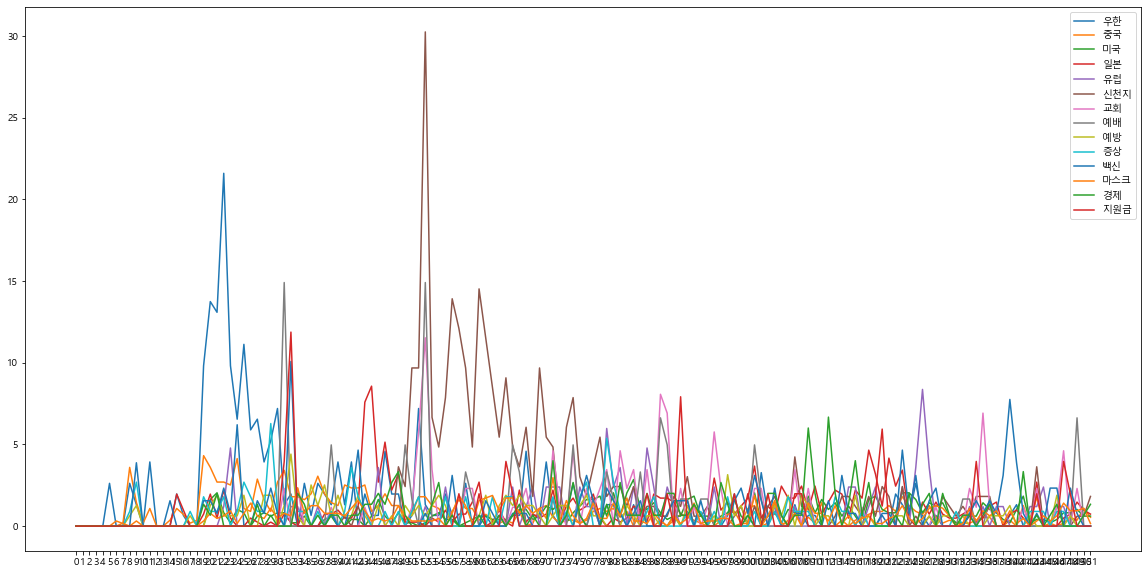

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 10)
plt.figure(figsize=(20,10))
plt.plot(df_tfidf)
plt.xticks(df_tfidf.index)
plt.legend(df_tfidf.columns, loc='upper right')
plt.show()

In [25]:
df_1 = df_tfidf[['우한','중국','미국','일본','유럽']]
df_2 = df_tfidf[['신천지','교회','예배']]
df_3 = df_tfidf[['예방','증상','백신']]
df_4 = df_tfidf[['마스크','경제','지원금']]
df_1['국제'] = df_1.sum(axis=1)
df_2['종교'] = df_2.sum(axis=1)
df_3['의료'] = df_3.sum(axis=1)
df_4['시장'] = df_4.sum(axis=1)

C:\Users\analysis\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\analysis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\analysis\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

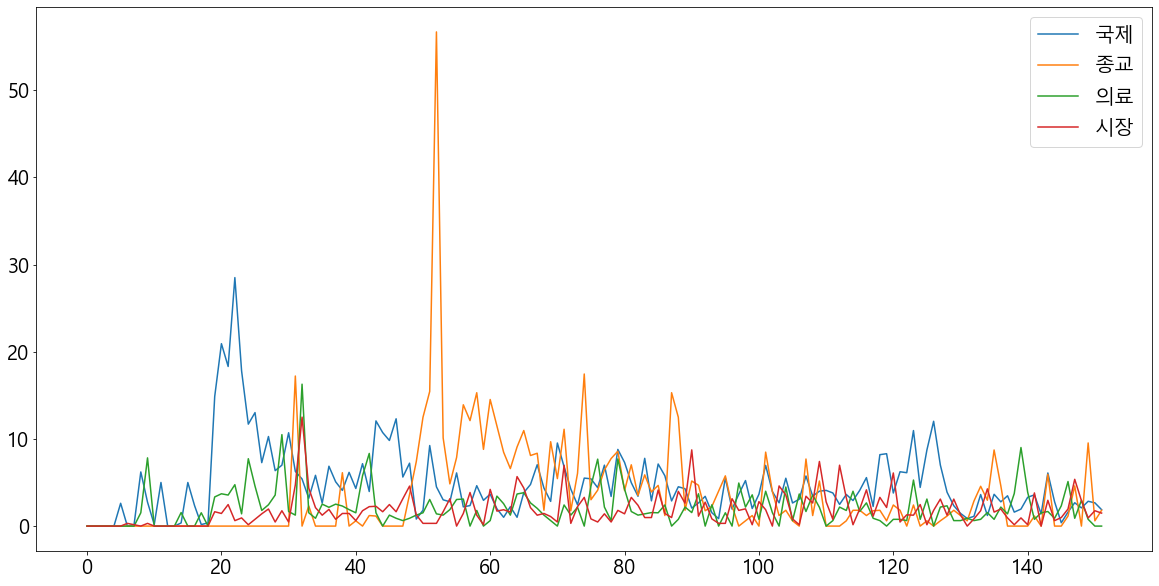

In [33]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 20)
plt.figure(figsize=(20,10))
plt.plot(df_1['국제'], label='국제')
plt.plot(df_2['종교'], label='종교')
plt.plot(df_3['의료'], label='의료')
plt.plot(df_4['시장'], label='시장')
# plt.xticks(pd.date_range('2020-1-1',periods=152))
plt.legend()
plt.show()

In [ ]:
# 등교 개학 인강 이태원 클럽 코인노래방 교육카테고리